In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
train_images = train_images/255.0
test_images = test_images/255.0


In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [18]:
opt = keras.optimizers.Adam(learning_rate=0.01)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [20]:
model_history  = model.fit(train_images,train_labels,batch_size=32,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8906 - accuracy: 0.2860
Epoch 2/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7480 - accuracy: 0.3418
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7065 - accuracy: 0.3608
Epoch 4/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6847 - accuracy: 0.3697
Epoch 5/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6763 - accuracy: 0.3743
Epoch 6/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6640 - accuracy: 0.3806
Epoch 7/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6510 - accuracy: 0.3885
Epoch 8/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6293 - accuracy: 0.3956
Epoch 9/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6132 - accuracy: 0.4081
Epoch 10/50
1563/1563 [==============================] - 49s 31m

In [21]:
model_loss,model_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 1.4828 - accuracy: 0.4661


In [29]:
print('model accuracy is : {:0.2f}%'.format(model_acc*100))

model accuracy is : 46.61%


testing with one sample image from test_images

In [84]:
test_image = test_images[3].reshape(1,32,32,3) #getting random image from the test_images

In [85]:
pred_img = model.predict(test_image)

1/1 [==============================] - 0s 37ms/step


In [86]:
pred_img

array([[-0.7874742 , -0.17256951, -3.4590938 , -4.0243425 , -3.7182405 ,
        -3.7574458 , -3.6468554 , -6.0484133 ,  0.9535388 , -0.7632021 ]],
      dtype=float32)

In [87]:
import numpy as np
np.argmax(pred_img) # getting label 8 as predicted output

8

In [89]:
test_labels[3] # label from the test dataset corresponding to the input image

array([0], dtype=uint8)

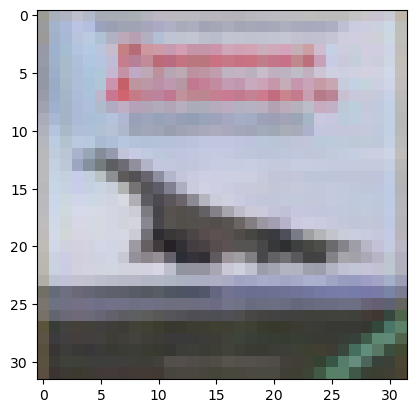

In [90]:
from matplotlib import pyplot as plt
plt.imshow(test_images[3]) #testing image

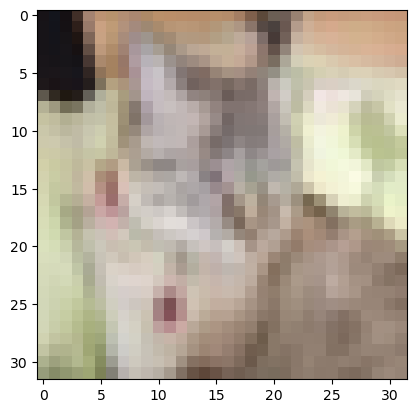

In [91]:
plt.imshow(test_images[8]) # predicted image